In [12]:
pip install wget

Note: you may need to restart the kernel to use updated packages.Collecting wget
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wget: started
  Running setup.py install for wget: finished with status 'done'



  DEPRECATION: wget is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


# **Launch Sites Locations Analysis with Folium**


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


## Objectives




*   Mark all launch sites on a map
*   Mark the success/failed launches for each site on the map
*   Calculate the distances between a launch site to its proximities



Let's first import required Python packages for this lab:


In [1]:
#!pip3 install folium
#!pip3 install wget

'pip3' is not recognized as an internal or external command,
operable program or batch file.
'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import folium
import wget
import pandas as pd

In [2]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

## Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


In [3]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)
spacex_df.to_csv('spacex_launch_geo.csv', index=False)
space_outcome_df=spacex_df
space_outcome_df.head()


,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


We can take a look at what are the coordinates for each site.


In [66]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
launch_sites = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites.head(5)


,Launch Site,Lat,Long,class
0,CCAFS LC-40,28.562302,-80.577356,0
1,CCAFS LC-40,28.562302,-80.577356,0
2,CCAFS LC-40,28.562302,-80.577356,0
3,CCAFS LC-40,28.562302,-80.577356,0
4,CCAFS LC-40,28.562302,-80.577356,0


To visualize, we first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [5]:
#NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=15)

#show map


We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


In [58]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='white', fill=False).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(

    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:white;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

Screenshot of rendered site_map
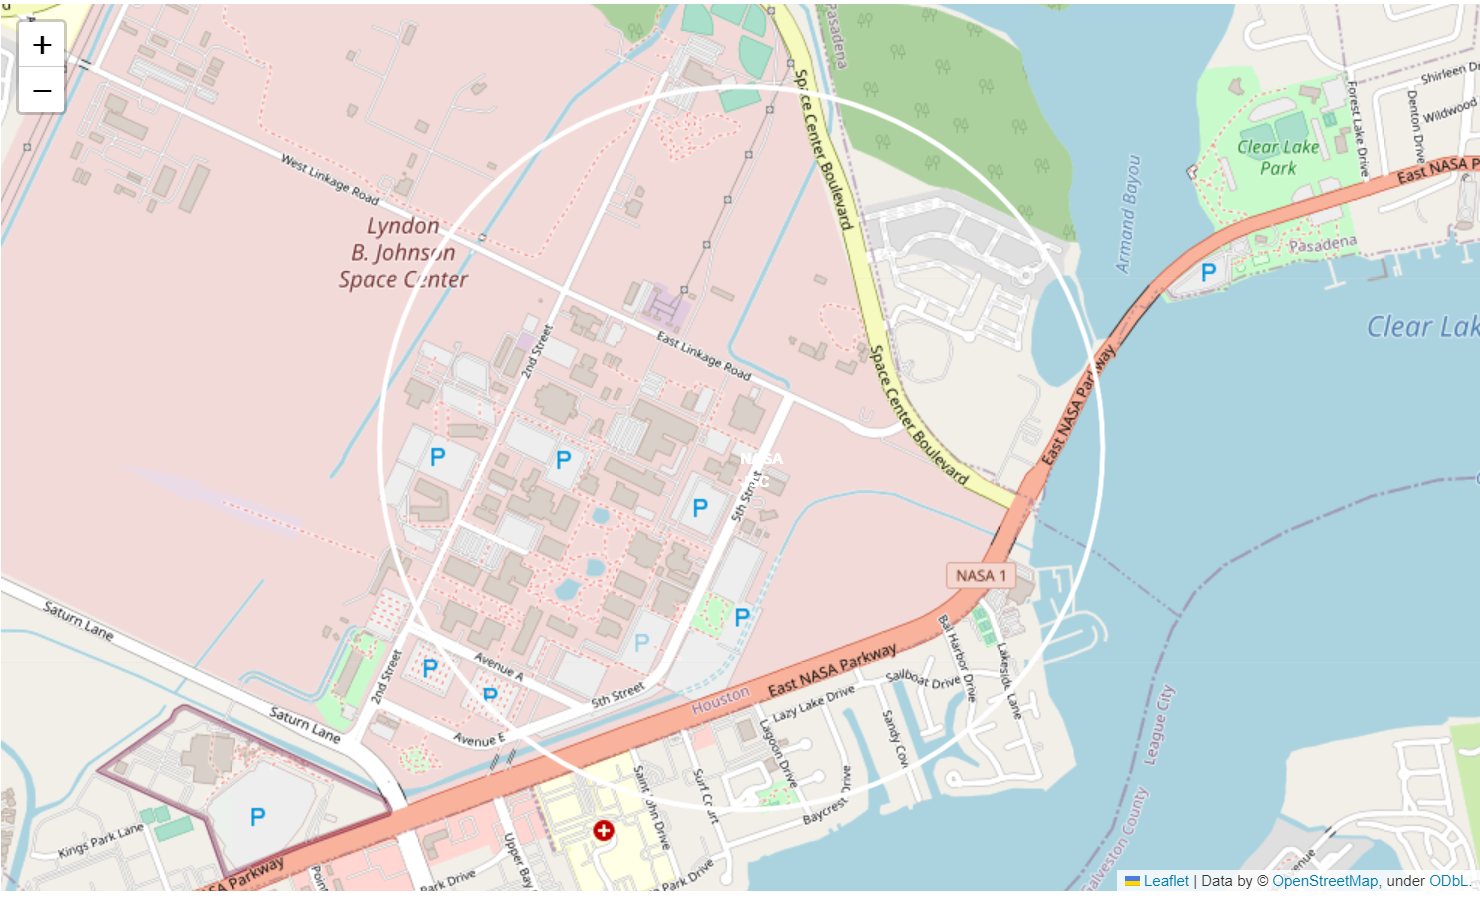

you should find a small circle near the city of Houston, with the caption (NASA JSC) and you can zoom-in to see a larger circle.


Now, let's add a circle for each launch site in data frame `launch_sites`


In [56]:
# Init the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=15)
for index, row in launch_sites.iterrows():
    circle = folium.Circle([row['Lat'], row['Long']], radius=1000, color='', fill=False).add_child(folium.Popup(row['Launch Site']))
    site_map.add_child(circle)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(site_map)
for index, row in launch_sites.iterrows():
    marker = folium.map.Marker(
        [row['Lat'], row['Long']],
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:red;"><b>%s</b></div>' % row['Launch Site'],
            )
        )
    marker_cluster.add_child(marker)



# Center the map at NASA Johnson Space Center , uncomment the following line
#site_map


Let's get the coordinate points for a given location on the map, by pointing cursor.

In [52]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

#site_map.add_child(mouse_position)

Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [47]:
space_outcome_df.head()
#space_outcome_df.drop(columns=['Time (UTC)','Orbit','Payload', 'Payload Mass (kg)'], inplace=True)
space_outcome_df.head()

,Flight Number,Date,Booster Version,Launch Site,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,F9 v1.0 B0003,CCAFS LC-40,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,F9 v1.0 B0004,CCAFS LC-40,NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,F9 v1.0 B0005,CCAFS LC-40,NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,F9 v1.0 B0006,CCAFS LC-40,NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,F9 v1.0 B0007,CCAFS LC-40,NASA (CRS),No attempt,0,28.562302,-80.577356


Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [60]:
#MarkerCluster Object
marker_cluster = MarkerCluster().add_to(site_map)

#use marker cluster object to create markers for all launches,if a class=1 then use a green marker, if a class=0 then use a red marker
for index, row in space_outcome_df.iterrows():
    if row['class'] == 1:
        marker1 = folium.map.Marker(
            [row['Lat'], row['Long']],
            # Create an icon as a text label
            icon=DivIcon(
                icon_size=(30,30),
                icon_anchor=(0,0),
                html='<div style="font-size: 12; color:green;"><b>%s</b></div>' % row['Launch Site'],
                )
            )
    else:
        if row['class'] == 0:
            marker1 = folium.map.Marker(
                [row['Lat'], row['Long']],
                # Create an icon as a text label
                icon=DivIcon(
                    
                    icon_size=(20,20),
                    icon_anchor=(0,0),
                    html='<div style="font-size: 12; color:red;"><b>%s</b></div>' % row['Launch Site'],
                    )
                )

    marker_cluster.add_child(marker1)
    site_map.add_child(marker_cluster)

#zoom out to see all markers
#display map
site_map


![](mapmarker.png)

# Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site. Our coast lines in question: `SantaBarbra_coastline` and `Florida_coastline`


We create a helper function to help us calculate the distance between points `X` and `Y`

In [61]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

Santa Barbara Coastline - `[34.63409, -120.6256]`
Florida Coastline - `[28.56305,-80.56790]`

In [75]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
SB_coastline_lat = 34.63409
SB_coastline_lon = -120.6256
FL_coastline_lat = 28.56305
FL_coastline_lon = -80.5679
launch_site_lat_SB = 34.632834
launch_site_lon_SB = -120.610745
launch_site_lat_FL = 28.573255
launch_site_lon_FL = -80.646895

distance_coastline_SB = calculate_distance(launch_site_lat_SB, launch_site_lon_SB, SB_coastline_lat, SB_coastline_lon)
# convert km to miles
print('This distance (mi) from VAFB SLC-4E to the Santa Barbara coastline is:',distance_coastline_SB * 0.621371)
distance_coastline_FL = calculate_distance(launch_site_lat_FL, launch_site_lon_FL, FL_coastline_lat, FL_coastline_lon)
# convert km to miles
print('This distance (mi) from KCS LC -39A to the Florida coastline is:',distance_coastline_FL * 0.621371)

SB_distance_coastline = distance_coastline_SB * 0.621371
FL_distance_coastline = distance_coastline_FL * 0.621371


This distance (mi) from VAFB SLC-4E to the Santa Barbara coastline is: 0.8492245888800557
This distance (mi) from KCS LC -39A to the Florida coastline is: 4.84660619332422


After obtained its coordinate, create a `folium.Marker` to show the distance


In [76]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
distance_marker_SB = folium.Marker(
    [SB_coastline_lat, SB_coastline_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:blue;"><b>%s</b></div>' % 'Santa Barbara coastline',
        )
    )

distance_marker_FL = folium.Marker(
    [FL_coastline_lat, FL_coastline_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:blue;"><b>%s</b></div>' % 'Florida coastline',
        )
    )
    


*TODO:* Draw a `PolyLine` between a launch site to the selected coastline point


In [77]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# Add the `folium.PolyLine` object to the map
# Add the distance marker to the map
folium.PolyLine(locations=[[launch_site_lat_SB, launch_site_lon_SB], [SB_coastline_lat, SB_coastline_lon]], color="blue", weight=2.5, opacity=1).add_to(site_map)
folium.PolyLine(locations=[[launch_site_lat_FL, launch_site_lon_FL], [FL_coastline_lat, FL_coastline_lon]], color="blue", weight=2.5, opacity=1).add_to(site_map)
distance_marker_SB.add_to(site_map)
distance_marker_FL.add_to(site_map)

# Display the map
site_map



![](polyline.png)

Note, `KSC LC -39A` is the only launch site plotted on the Florida coast.